Accuracy: 0.93890
494.6243357658386


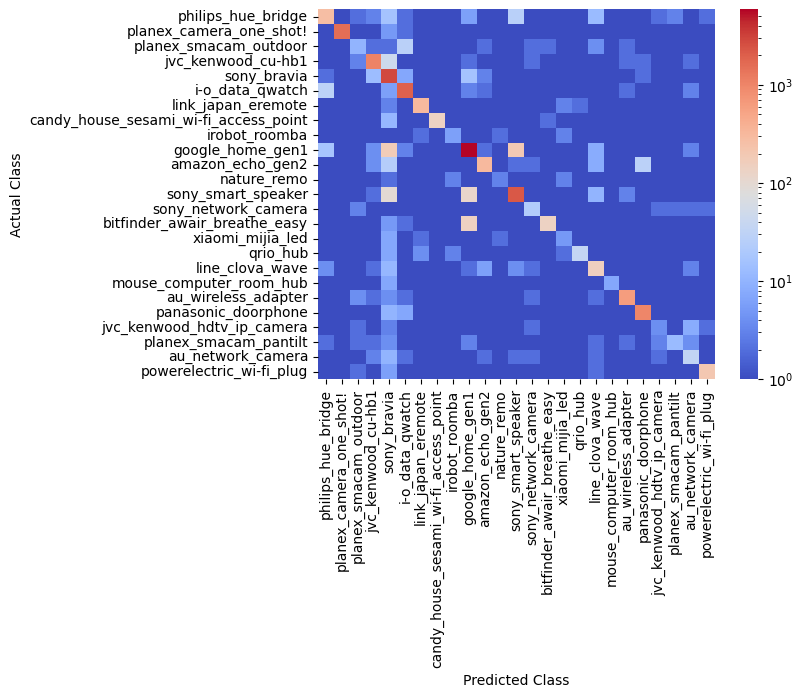

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 17:04:49 2024

@author: camer
"""

from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
start_time = time()

seed = 42

columns = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

headers=["philips_hue_bridge",
"planex_camera_one_shot!",
"planex_smacam_outdoor",
"jvc_kenwood_cu-hb1",
"sony_bravia",
"i-o_data_qwatch",
"link_japan_eremote",
"candy_house_sesami_wi-fi_access_point",
"irobot_roomba",
"google_home_gen1",
"amazon_echo_gen2",
"nature_remo",
"sony_smart_speaker",
"sony_network_camera",
"bitfinder_awair_breathe_easy",
"xiaomi_mijia_led",
"qrio_hub",
"line_clova_wave",
"mouse_computer_room_hub",
"au_wireless_adapter",
"panasonic_doorphone",
"jvc_kenwood_hdtv_ip_camera",
"planex_smacam_pantilt",
"au_network_camera"
,"powerelectric_wi-fi_plug"
]

# Load and preprocess data
'''
df_train2 = pd.read_csv("aug80000.csv", names=column_names)
df_test2 = pd.read_csv("sep1M.csv",names=column_names)
'''

df2 = pd.read_csv("sample2.csv", names=columns)
sample = df2.drop(columns = ['name','IoTIP_int', 'hostIP_int', 'year_month','hostMac'])
data = sample.drop(columns=['start_date', 'start_time', 'IoTIP', 'IoTPort', 'hostIP', 'hostPort', 'BytesCount', 'reversePacketCount', 'reverseBytesCount', 'reverseMaxPktSize', 'reverseStdevIAT', 'reverseAvgPacketSize', 'reverseFlowExists', 'broadcast'])

# Define input features (X) and target (y)
x = data.drop(columns=['IoTMac'])
y = data['IoTMac']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(x)

# Encode the target variable (y) for multi-class classification
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


# Normalize the input data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


clf = svm.SVC(C=5, gamma=1000, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
cmatrix = confusion_matrix(y_test, y_pred)
for f in cmatrix:
    f += 1



import seaborn as sns
from matplotlib.colors import LogNorm
sns_map = sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
sns_map.set_xlabel('Predicted Class')
sns_map.set_ylabel('Actual Class')
sns_map.xaxis.set_ticklabels(headers)
sns_map.tick_params(axis='y',rotation=0)
sns_map.set_yticks(np.arange(25)+0.5)
sns_map.yaxis.set_ticklabels(headers)
#crosstab = pd.crosstab(y_test2,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
print(time() - start_time)

# 0.82700 - poly
# 0.85450 - rbf - gamma = 10000
# 0.92350, rbf, C = 5, gamma = 1000
